In [1]:
from dp_policy.experiments import titlei_funding as funding, titlei_grid as test_params
from dp_policy.titlei.allocators import AbowdAllocator, SonnenbergAuthorizer
from dp_policy.titlei.utils import weighting
from dp_policy.titlei.mechanisms import Laplace, Gaussian, GroundTruth
from dp_policy.titlei.utils import *
from dp_policy.titlei.thresholders import *
from dp_policy.titlei.evaluation import *
from dp_policy.experiments import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns



In [2]:
saipe = get_inputs(2021)
sppe = get_sppe("../data/sppe18.xlsx")
print(saipe.shape)

plt.style.use('seaborn-deep')

%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/kentarohoffman/Desktop/dp-policy-master-2


/Users/kentarohoffman/Desktop/dp-policy-master-2/dp_policy/titlei/utils.py:70: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined.loc[:, "State FIPS Code"] = \


[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
(13190, 25)


/var/folders/0s/_wb58sfj7zlbs9_f_fpks_ym0000gn/T/ipykernel_26652/2294734140.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


In [3]:
saipe.head()


Name  \
State FIPS Code District ID                                        
1               190               Alabaster City School District   
                5               Albertville City School District   
                30           Alexander City City School District   
                60                Andalusia City School District   
                90                 Anniston City School District   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
1               190                         451569.585546   
                5                           820486.906460   
                30                          548830.474149   
                60                          255888.455695   
                90                          690724.128654   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
1               190                                  58092.627841   
                5                                   200836.024036   
                30                                  135670.119992   
                60                                   63255.265741   
                90                                  170746.031480   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
1               190                            182516.637263   
                5                              553590.326339   
                30                             392958.114409   
                60                             157617.381627   
                90                             537272.595916   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
1               190                        194698.670798   
                5                          592983.087034   
                30                         419186.018887   
                60                         168137.519722   
                90                         573132.739294   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
1               190                          8.868775e+05   
                5                            2.167896e+06   
                30                           1.496645e+06   
                60                           6.448986e+05   
                90                           1.971875e+06   

                             official_basic_alloc  \
State FIPS Code District ID                         
1               190                 404482.451481   
                5                   738438.215814   
                30                  493947.426734   
                60                  245814.743916   
                90                  662918.490317   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
1               190                              0.000000   
                5                           180752.421632   
                30                          122103.107993   
                60                           62375.463078   
                90                          168215.490893   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
1               190                    159746.293284        166408.047625   
                5                      498231.293705        533684.778331   
                30                     353662.302968        377267.416998   
                60                     144408.067790        151323.767750   
                90                     510408.966121        544476.102330   

                             ... 

In [4]:
sppe.head()

,Name,ppe,Postal Code
State FIPS Code,,,
1,Alabama,9697,AL
2,Alaska,17726,AK
4,Arizona,8296,AZ
5,Arkansas,10072,AR
6,California,12510,CA


In [5]:
saipe.columns

Index(['Name', 'official_basic_hold_harmless',
       'official_concentration_hold_harmless',
       'official_targeted_hold_harmless', 'official_efig_hold_harmless',
       'official_total_hold_harmless', 'official_basic_alloc',
       'official_concentration_alloc', 'official_targeted_alloc',
       'official_efig_alloc', 'official_total_alloc',
       'official_hold_harmless_percentage', 'official_total_formula_count',
       'official_5-17_pop.', 'official_percent_formula',
       'official_basic_eligibles', 'official_concentration_eligibles',
       'official_targeted_eligibles', 'official_weighted_counts_targeted',
       'official_weighted_counts_efig', 'State Postal Code',
       'Estimated Total Population', 'Estimated Population 5-17',
       'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder',
       'cv'],
      dtype='object')

In [14]:
official_inputs = get_inputs(2021, use_official_children=True)
allocs1 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_prop_laplace'})

/Users/kentarohoffman/Desktop/dp-policy-master-2


/Users/kentarohoffman/Desktop/dp-policy-master-2/dp_policy/titlei/utils.py:70: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined.loc[:, "State FIPS Code"] = \


[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
State FIPS Code  District ID
1                190             649.0
                 5               957.0
                 30              703.0
                 60              406.0
                 90             1057.0
                                 ...  
56               4260             28.0
                 6240            148.0
                 5820             12.0
                 4830            108.0
                 6090             12.0
Name: true_children_poverty, Length: 13190, dtype: float64
State FIPS Code  District ID
1                190             639.031740
                 5               959.046797
                 30              709.575386
                 60              407.103426
                 90             1066.821329
                                 

In [11]:
allocs1

Name  \
State FIPS Code District ID                                        
1               190               Alabaster City School District   
                5               Albertville City School District   
                30           Alexander City City School District   
                60                Andalusia City School District   
                90                 Anniston City School District   
...                                                          ...   
56              4260              Uinta County School District 6   
                6240           Washakie County School District 1   
                5820           Washakie County School District 2   
                4830             Weston County School District 1   
                6090             Weston County School District 7   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
1               190                         451569.585546   
                5                           820486.906460   
                30                          548830.474149   
                60                          255888.455695   
                90                          690724.128654   
...                                                   ...   
56              4260                         40822.247350   
                6240                        223321.706091   
                5820                             0.000000   
                4830                        182499.458741   
                6090                         20411.123675   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
1               190                                  58092.627841   
                5                                   200836.024036   
                30                                  135670.119992   
                60                                   63255.265741   
                90                                  170746.031480   
...                                                           ...   
56              4260                                     0.000000   
                6240                                 24485.720477   
                5820                                  5762.953584   
                4830                                 93609.867864   
                6090                                     0.000000   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
1               190                            182516.637263   
                5                              553590.326339   
                30                             392958.114409   
                60                             157617.381627   
                90                             537272.595916   
...                                                      ...   
56              4260                                0.000000   
                6240                           149352.494295   
                5820                                0.000000   
                4830                           135338.332211   
                6090                            13650.496790   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
1               190                        194698.670798   
                5                          592983.087034   
                30                         419186.018887   
                60                         168137.519722   
                90                         573132.739294   
...                                                  ...   
56              4260                            0.000000   
                6240                       148614.520996   
                5820                            0.

In [40]:
official_inputs = get_inputs(2021, use_official_children=True)
allocs1 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'gaussian'})
 
allocs2 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H'})

allocs3 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_HB'})
 
allocs4 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_no_noise'})

allocs4 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H_prop'})

alloc5 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H_reg'})
 

/Users/kentarohoffman/Desktop/dp-policy-master-2


/Users/kentarohoffman/Desktop/dp-policy-master-2/dp_policy/titlei/utils.py:70: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined.loc[:, "State FIPS Code"] = \


[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575


In [26]:
allocs1 = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H_prop'})



In [10]:
allocs1['est_grant_total'].values[0:10]

array([ 586581.17223715, 1083796.59638323,  821909.24314364,
        476111.21378769, 1394885.35616709,  198722.89341764,
        671041.13487566,  330699.41409296,  537772.04052053,
       1302059.63592394])

In [11]:
allocs2['est_grant_total'].values[0:10]

array([      0.        ,       0.        ,       0.        ,
             0.        , 1014829.494237  ,  507414.7471185 ,
             0.        ,  522790.95157664,       0.        ,
             0.        ])

In [12]:
allocs3['est_grant_total'].values[0:10]

array([ 587318.38685238, 1085320.89650351,  824129.1236845 ,
        475972.97572488, 1398596.97155523,  198394.75270162,
        671653.96940346,  329975.18108606,  538375.18794802,
       1305589.16681728])

In [13]:
allocs4['est_grant_total'].values[0:10]

array([ 738117.08101063,  519623.22021811,  331942.59620402,
        141460.76884644,  554638.26201179,  147063.17553343,
        599457.51550769,  102243.92203753,  826354.98633069,
       1328702.68421718])

In [235]:
from tqdm import tqdm

#are the pop levers we are pulling matter?
n_sim = 10

df_allocation = np.empty([1,13190])
HB_allocation = np.empty([1,13190])
H_allocation = np.empty([1,13190])
H_prop_allocation = np.empty([1,13190])
H_reg_allocation = np.empty([1,13190])

df_allocations = np.empty([n_sim,13190])
HB_shrunk_allocations = np.empty([n_sim,13190])
H_shrunk_allocations = np.empty([n_sim,13190])
H_prop_shrunk_allocations = np.empty([n_sim,13190])
H_reg_shrunk_allocations = np.empty([n_sim,13190])

df_allocations_dp = np.empty([n_sim,13190])
HB_allocations_dp = np.empty([n_sim,13190])
H_prop_shrunk_allocations_dp = np.empty([n_sim,13190])

official_inputs = get_inputs(2021, use_official_children=True)

allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'gaussian_no_noise'})
df_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_HB'})
HB_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H'})
H_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H_prop'})
H_prop_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H_reg'})
H_reg_allocation[0,:] = allocs['est_grant_total'].values

#Sampling
for i in tqdm(range(0,n_sim)):
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'gaussian'})
    df_allocations[i,:] = allocs['est_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_HB'})
    HB_shrunk_allocations[i,:] = allocs['est_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H'})
    H_shrunk_allocations[i,:] = allocs['est_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_prop'})
    H_prop_shrunk_allocations[i,:] = allocs['est_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_reg'})
    H_reg_shrunk_allocations[i,:] = allocs['est_grant_total'].values  
    
#DP    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'gaussian_laplace'})
    df_allocations_dp[i,:] = allocs['est_grant_total'].values     
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_HB_lapalce'})
    HB_allocations_dp[i,:] = allocs['est_grant_total'].values         
        
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_prop_laplace'})
    H_prop_shrunk_allocations_dp[i,:] = allocs['est_grant_total'].values    

/Users/kentarohoffman/Desktop/dp-policy-master-2


/Users/kentarohoffman/Desktop/dp-policy-master-2/dp_policy/titlei/utils.py:70: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined.loc[:, "State FIPS Code"] = \


[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575


100%|███████████████████████████████████████████| 10/10 [00:14<00:00,  1.48s/it]


In [241]:

for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_prop_laplace'})
    H_prop_shrunk_allocations_dp[i,:] = allocs['est_grant_total'].values    

100%|███████████████████████████████████████████| 10/10 [00:15<00:00,  1.50s/it]


In [228]:
allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_prop'})

In [229]:
allocs = funding(SonnenbergAuthorizer, official_inputs, Gaussian(epsilon = 1.0, delta = 0.0000001), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_prop_laplace'})  

In [230]:
H_prop_shrunk_allocations.shape

(10, 13190)

In [251]:
from tqdm import tqdm

#are the pop levers we are pulling matter?
n_sim = 1000

df_allocation = np.empty([1,13190])
HB_allocation = np.empty([1,13190])
H_allocation = np.empty([1,13190])
H_prop_allocation = np.empty([1,13190])
H_reg_allocation = np.empty([1,13190])

df_allocations = np.empty([n_sim,13190])
HB_shrunk_allocations = np.empty([n_sim,13190])
H_shrunk_allocations = np.empty([n_sim,13190])
H_prop_shrunk_allocations = np.empty([n_sim,13190])
H_reg_shrunk_allocations = np.empty([n_sim,13190])

df_allocations_dp = np.empty([n_sim,13190])
HB_allocations_dp = np.empty([n_sim,13190])
H_prop_shrunk_allocations_dp = np.empty([n_sim,13190])

official_inputs = get_inputs(2021, use_official_children=True)

allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'gaussian_no_noise'})
df_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_HB'})
HB_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H'})
H_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H_prop'})
H_prop_allocation[0,:] = allocs['est_grant_total'].values

allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JS_unequalvar_no_noise_H_reg'})
H_reg_allocation[0,:] = allocs['est_grant_total'].values

#Sampling
for i in tqdm(range(0,n_sim)):
    allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'gaussian'})
    df_allocations[i,:] = allocs['est_grant_total'].values
    df_allocations_dp[i,:] = allocs['dpest_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_HB'})
    HB_shrunk_allocations[i,:] = allocs['est_grant_total'].values
    HB_allocations_dp[i,:] = allocs['dpest_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H'})
    H_shrunk_allocations[i,:] = allocs['est_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_prop'})
    H_prop_shrunk_allocations[i,:] = allocs['est_grant_total'].values
    H_prop_shrunk_allocations_dp[i,:] = allocs['dpest_grant_total'].values
    
for i in tqdm(range(0,n_sim)): 
    allocs = funding(SonnenbergAuthorizer, official_inputs, Laplace(epsilon = 0.1, delta = 0.0), sppe,sampling_kwargs = {'distribution':'JSGaussian_unequalvar_H_reg'})
    H_reg_shrunk_allocations[i,:] = allocs['est_grant_total'].values  
    
    
    

/Users/kentarohoffman/Desktop/dp-policy-master-2


/Users/kentarohoffman/Desktop/dp-policy-master-2/dp_policy/titlei/utils.py:70: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined.loc[:, "State FIPS Code"] = \


[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575


100%|███████████████████████████████████████| 1000/1000 [24:50<00:00,  1.49s/it]


In [248]:
allocs

Name  \
State FIPS Code District ID                                        
1               190               Alabaster City School District   
                5               Albertville City School District   
                30           Alexander City City School District   
                60                Andalusia City School District   
                90                 Anniston City School District   
...                                                          ...   
56              4260              Uinta County School District 6   
                6240           Washakie County School District 1   
                5820           Washakie County School District 2   
                4830             Weston County School District 1   
                6090             Weston County School District 7   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
1               190                         451569.585546   
                5                           820486.906460   
                30                          548830.474149   
                60                          255888.455695   
                90                          690724.128654   
...                                                   ...   
56              4260                         40822.247350   
                6240                        223321.706091   
                5820                             0.000000   
                4830                        182499.458741   
                6090                         20411.123675   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
1               190                                  58092.627841   
                5                                   200836.024036   
                30                                  135670.119992   
                60                                   63255.265741   
                90                                  170746.031480   
...                                                           ...   
56              4260                                     0.000000   
                6240                                 24485.720477   
                5820                                  5762.953584   
                4830                                 93609.867864   
                6090                                     0.000000   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
1               190                            182516.637263   
                5                              553590.326339   
                30                             392958.114409   
                60                             157617.381627   
                90                             537272.595916   
...                                                      ...   
56              4260                                0.000000   
                6240                           149352.494295   
                5820                                0.000000   
                4830                           135338.332211   
                6090                            13650.496790   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
1               190                        194698.670798   
                5                          592983.087034   
                30                         419186.018887   
                60                         168137.519722   
                90                         573132.739294   
...                                                  ...   
56              4260                            0.000000   
                6240                       148614.520996   
                5820                            0.

In [250]:
np.savetxt("Gaussian/Gaussian_allocation.csv", df_allocation, delimiter=",")
np.savetxt("HB/HB_allocation.csv", HB_allocation, delimiter=",")
np.savetxt("H/H_allocation.csv", H_allocation, delimiter=",")
np.savetxt("H_prop/H_prop_allocation.csv", H_prop_allocation, delimiter=",")
np.savetxt("H_reg/H_reg_allocation.csv", H_reg_allocation, delimiter=",")

np.savetxt("Gaussian/Gaussian_allocations.csv", df_allocations, delimiter=",")
np.savetxt("HB/HB_shrunk_allocations.csv", HB_shrunk_allocations, delimiter=",")
np.savetxt("H/H_shrunk_allocations.csv", H_shrunk_allocations, delimiter=",")
np.savetxt("H_prop/H_prop_shrunk_allocations.csv", H_prop_shrunk_allocations, delimiter=",")
np.savetxt("H_reg/H_reg_allocations.csv", H_reg_shrunk_allocations, delimiter=",")

np.savetxt('Gaussian/Gaussian_allocations_dp.csv',df_allocations_dp,delimiter = ",")
np.savetxt('HB/HB_allocations_dp.csv',HB_allocations_dp,delimiter = ",")
np.savetxt('H_prop/H_prop_shrunk_allocations_dp.csv',H_prop_shrunk_allocations_dp,delimiter = ",")







In [67]:
H_prop_shrunk_allocations[1:10]

array([[945756.4116356 , 522471.04571893,  62578.63162311, ...,
             0.        , 190688.11666523,  31432.10714262],
       [568404.27718125, 637174.17738343, 269465.73140444, ...,
             0.        , 199994.25987292,  31578.04103257],
       [891312.48801517, 194390.30048834, 102969.11956561, ...,
             0.        , 184409.62997429,  39815.71556263],
       ...,
       [602238.50163316, 556679.08779803, 111249.24307673, ...,
             0.        , 115322.35988359,  36305.18737076],
       [622463.52559206, 681212.89205244, 388864.8541901 , ...,
             0.        , 237095.84996435,  46160.25397536],
       [618634.15713451, 481005.43453604, 355888.41399199, ...,
         39319.04198777, 123031.83673993,  35449.85126405]])

In [66]:
H_prop_shrunk_allocations_dp[1:10]

array([[ 763889.94063888, 1241346.62780741, 1067685.73539338, ...,
              0.        ,  133514.21363698,       0.        ],
       [ 693931.99557415, 1005912.28355692,  733833.06831435, ...,
              0.        ,  273843.74494239,       0.        ],
       [ 667323.40584854,  779369.73897525,  915752.32157979, ...,
          35611.72035836,  122986.93270352,   24597.3865407 ],
       ...,
       [ 404611.20060084,  830998.85806428,  831668.30365956, ...,
              0.        ,  140357.7466926 ,       0.        ],
       [ 640473.20025103,  704013.05083043,  548100.95884763, ...,
          21808.35059667,  132607.84872589,  112041.95893027],
       [ 688917.95897222, 1083939.83081561,  981350.37907215, ...,
              0.        ,  292572.35174961,       0.        ]])

In [ ]:
official_inputs = get_inputs(2021, use_official_children=True)
sampling_kwargs = {'distribution':'JSGaussian'}
allocs = funding(SonnenbergAuthorizer, official_inputs, GroundTruth(), sppe,sampling_kwargs = sampling_kwargs)

allocs['est_grant_basic']

In [ ]:
new_saipe = get_inputs(2021, use_official_children=True)
#official_basic_eligibles is the offical amount allocated to each district. If set to 0, then est_grant_basic also goes to 0
#new_saipe['official_basic_alloc'] = 1


       
    
new_saipe['Estimated Total Population'] = 0
new_saipe['Estimated Population 5-17'] =0
new_saipe['Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder'] = 0
new_saipe['official_total_formula_count'] = 100000


#new_saipe['Estimated Population 5-17'] = 0

allocs = funding(SonnenbergAuthorizer, new_saipe, GroundTruth(), sppe)
allocs['est_grant_basic']

In [166]:
allocs['true_grant_basic']

State FIPS Code  District ID
1                190            417864.531870
                 5              602271.316365
                 30             439595.971120
                 60             253947.390096
                 90             684850.785516
                                    ...      
56               4260            27009.096422
                 6240           140633.571023
                 5820            11176.177830
                 4830           116418.519058
                 6090            13038.874135
Name: true_grant_basic, Length: 13190, dtype: float64

In [162]:
allocs.columns

Index(['Name', 'official_basic_hold_harmless',
       'official_concentration_hold_harmless',
       'official_targeted_hold_harmless', 'official_efig_hold_harmless',
       'official_total_hold_harmless', 'official_basic_alloc',
       'official_concentration_alloc', 'official_targeted_alloc',
       'official_efig_alloc', 'official_total_alloc',
       'official_hold_harmless_percentage', 'official_total_formula_count',
       'official_5-17_pop.', 'official_percent_formula',
       'official_basic_eligibles', 'official_concentration_eligibles',
       'official_targeted_eligibles', 'official_weighted_counts_targeted',
       'official_weighted_counts_efig', 'State Postal Code', 'true_pop_total',
       'true_children_total', 'true_children_poverty', 'cv', 'est_pop_total',
       'est_children_total', 'est_children_poverty', 'dpest_pop_total',
       'dpest_children_total', 'dpest_children_poverty', 'dp_pop_total',
       'dp_children_total', 'dp_children_poverty', 'true_children_eli

In [172]:
allocs['est_children_poverty']

allocs['est_children_eligible']

State FIPS Code  District ID
1                190             673.0
                 5               970.0
                 30              708.0
                 60              409.0
                 90             1103.0
                                 ...  
56               4260             29.0
                 6240            151.0
                 5820             12.0
                 4830            125.0
                 6090             14.0
Name: est_children_eligible, Length: 13190, dtype: float64

In [82]:
allocs.columns

Index(['Name', 'official_basic_hold_harmless',
       'official_concentration_hold_harmless',
       'official_targeted_hold_harmless', 'official_efig_hold_harmless',
       'official_total_hold_harmless', 'official_basic_alloc',
       'official_concentration_alloc', 'official_targeted_alloc',
       'official_efig_alloc', 'official_total_alloc',
       'official_hold_harmless_percentage', 'official_total_formula_count',
       'official_5-17_pop.', 'official_percent_formula',
       'official_basic_eligibles', 'official_concentration_eligibles',
       'official_targeted_eligibles', 'official_weighted_counts_targeted',
       'official_weighted_counts_efig', 'State Postal Code', 'true_pop_total',
       'true_children_total', 'true_children_poverty', 'cv', 'est_pop_total',
       'est_children_total', 'est_children_poverty', 'dpest_pop_total',
       'dpest_children_total', 'dpest_children_poverty', 'dp_pop_total',
       'dp_children_total', 'dp_children_poverty', 'true_children_eli

In [46]:
official_inputs = get_inputs(2021, use_official_children=True)

def compare_allocs(grant_type="total", **kwargs):
    allocs = funding(
        SonnenbergAuthorizer, official_inputs, GroundTruth(), sppe,
        allocator_kwargs=kwargs
    )
    print(
        "State level error",
        allocs[f"official_{grant_type}_alloc"].groupby("State FIPS Code").sum() -
        allocs[f"true_grant_{grant_type}"].groupby("State FIPS Code").sum()
    )
    if grant_type == "total":
        official = allocs[f"official_total_alloc"] - allocs[f"official_efig_alloc"]
    else:
        official = allocs[f"official_{grant_type}_alloc"]
    calculated = allocs[f"true_grant_{grant_type}"]
    allocs["error"] = official - calculated
    allocs["error_abs"] = allocs.error.abs()
    print("Average abs error", allocs.error_abs.mean())
    print(
        "RMSE", 
        np.sqrt(np.mean(np.power(allocs.error, 2))), 
        "(average alloc is", 
        np.mean(allocs[f"official_total_alloc"]), 
        ")"
    )

    ax = plt.gca()
    plt.scatter(official, calculated, s=10, rasterized=True)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    plt.xlabel("Official 2021 Allocation")
    plt.ylabel("Our calculated allocation (no injected noise)")
    plt.savefig(f"../plots/robustness/official_{grant_type}.pdf", transparent=True, dpi=300)
    plt.show()

    # plt.hist(allocs.error, bins=50)
    # plt.show()

    display(allocs.sort_values("error_abs", ascending=False).head(5))

/Users/kentarohoffman/Downloads/dp-policy-master-2
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575


/Users/kentarohoffman/Downloads/dp-policy-master-2
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575


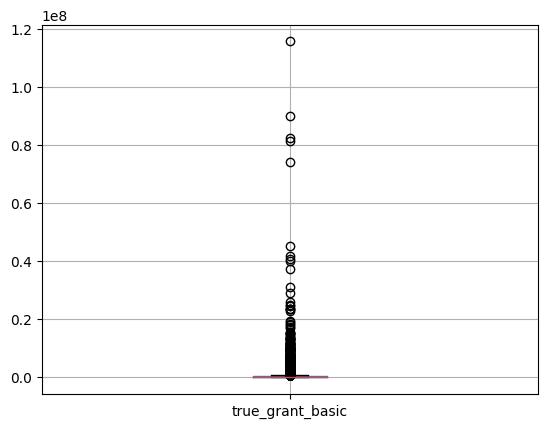

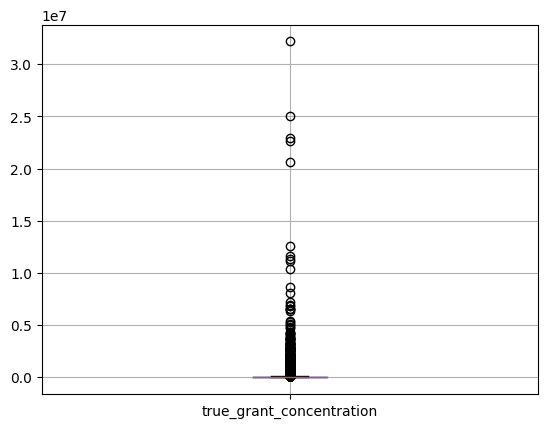

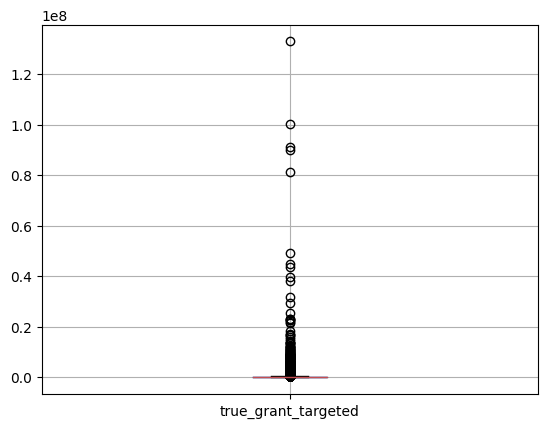

total
State level error State FIPS Code
1     6.910050e+07
2     1.727093e+07
4     8.954219e+07
5     4.526321e+07
6     5.648967e+08
8     4.836872e+07
9     4.272197e+07
10    1.698622e+07
11    1.608756e+07
12    2.209907e+08
13    1.325106e+08
15    1.554488e+07
16    1.639109e+07
17    1.592521e+08
18    6.713091e+07
19    2.982481e+07
20    2.532719e+07
21    7.428141e+07
22    8.766432e+07
23    1.761418e+07
24    8.102885e+07
25    6.772895e+07
26    1.291163e+08
27    4.826552e+07
28    5.958592e+07
29    6.625734e+07
30    1.662187e+07
31    1.805842e+07
32    3.440820e+07
33    1.513068e+07
34    9.612916e+07
35    3.381221e+07
36    2.877003e+08
37    1.281273e+08
38    1.778415e+07
39    1.531544e+08
40    5.285914e+07
41    4.251288e+07
42    1.762226e+08
44    1.663654e+07
45    6.750897e+07
46    1.839437e+07
47    8.194110e+07
48    4.044816e+08
49    2.333225e+07
50    1.411873e+07
51    6.977850e+07
53    9.129869e+07
54    3.002566e+07
55    5.839729e+07
56    1.38

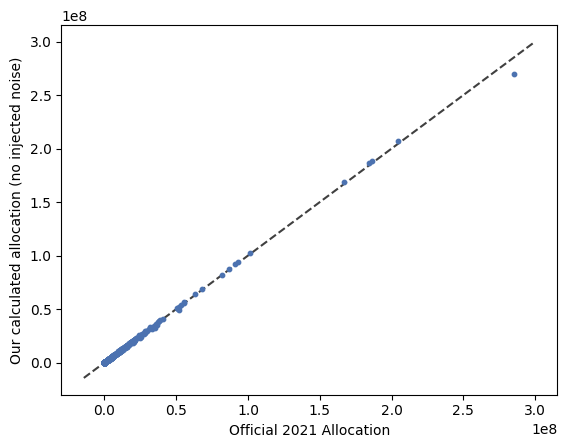

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
                14550             Fresno Unified School District   
36              82047                               Kings County   
11              30           District of Columbia Public Schools   
36              82024                               Bronx County   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
                14550                        2.120322e+07   
36              82047                        8.827453e+07   
11              30                           1.774410e+07   
36              82024                        7.880462e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
                14550                                5.241393e+06   
36              82047                                2.182134e+07   
11              30                                   4.229167e+06   
36              82024                                1.931969e+07   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
                14550                           1.861120e+07   
36              82047                           9.270965e+07   
11              30                              1.444236e+07   
36              82024                           8.123289e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
                14550                       1.813083e+07   
36              82047                       8.319514e+07   
11              30                          1.405369e+07   
36              82024                       7.250087e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
                14550                        6.318665e+07   
36              82047                        2.860007e+08   
11              30                           5.046931e+07   
36              82024                        2.518581e+08   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
                14550                2.379983e+07   
36              82047                8.712931e+07   
11              30                   1.774410e+07   
36              82024                7.976208e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
                14550                        6.039204e+06   
36              82047                        2.210905e+07   
11              30                           3.806250e+06   
36              82024                        2.023962e+07   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
                14550                   2.182530e+07         2.159909e+07   
36              82047                   9.498686e+07         8.667319e+07   
11              30                      1.371071e+07         1.360056e+07   
36              82024                   8.625801e+07         7.837469e+07   

                             ... 

basic
State level error State FIPS Code
1    -9.059529e+05
2     1.678302e+06
4    -1.472287e+06
5    -5.308251e+05
6     3.508586e+07
8     3.408538e+06
9    -7.503860e+05
10   -4.190583e+05
11    1.774410e+06
12   -3.460595e+06
13   -7.554960e+06
15   -7.426065e+04
16   -2.313910e+05
17   -3.494060e+06
18   -7.804844e+05
19   -4.888946e+05
20   -2.722386e+06
21    1.586333e+06
22   -3.174516e+06
23    5.816682e+05
24    2.952928e+06
25   -1.385219e+06
26   -8.981523e+05
27   -1.496863e+06
28   -8.926895e+05
29   -1.075726e+06
30   -5.135560e+04
31   -4.618631e+05
32   -6.992949e+05
33    1.231833e+06
34   -2.190058e+06
35   -5.742125e+05
36   -5.944147e+06
37   -2.222146e+06
38    2.778443e+06
39   -5.217642e+06
40   -7.472670e+05
41    1.221915e+06
42   -3.618215e+06
44   -2.837225e+05
45   -2.155308e+06
46    1.733936e+06
47   -1.062262e+06
48   -6.219283e+06
49   -4.632268e+05
50    1.686977e+06
51   -2.626901e+06
53    8.443689e+06
54    1.053093e+06
55   -4.634364e+05
56    1.59

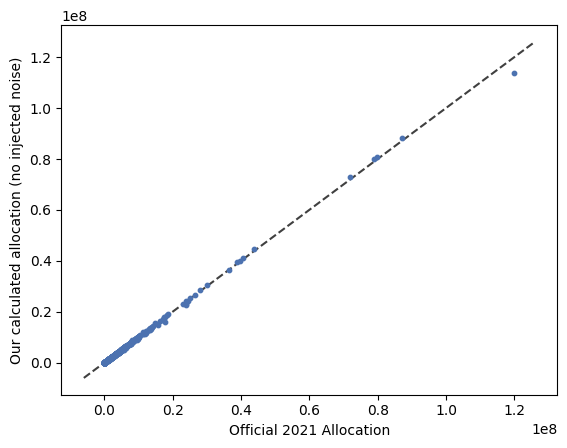

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
11              30           District of Columbia Public Schools   
6               14550             Fresno Unified School District   
36              82047                               Kings County   
                82024                               Bronx County   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
11              30                           1.774410e+07   
6               14550                        2.120322e+07   
36              82047                        8.827453e+07   
                82024                        7.880462e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
11              30                                   4.229167e+06   
6               14550                                5.241393e+06   
36              82047                                2.182134e+07   
                82024                                1.931969e+07   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
11              30                              1.444236e+07   
6               14550                           1.861120e+07   
36              82047                           9.270965e+07   
                82024                           8.123289e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
11              30                          1.405369e+07   
6               14550                       1.813083e+07   
36              82047                       8.319514e+07   
                82024                       7.250087e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
11              30                           5.046931e+07   
6               14550                        6.318665e+07   
36              82047                        2.860007e+08   
                82024                        2.518581e+08   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
11              30                   1.774410e+07   
6               14550                2.379983e+07   
36              82047                8.712931e+07   
                82024                7.976208e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
11              30                           3.806250e+06   
6               14550                        6.039204e+06   
36              82047                        2.210905e+07   
                82024                        2.023962e+07   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
11              30                      1.371071e+07         1.360056e+07   
6               14550                   2.182530e+07         2.159909e+07   
36              82047                   9.498686e+07         8.667319e+07   
                82024                   8.625801e+07         7.837469e+07   

                             ... 

concentration
State level error State FIPS Code
1    -1.031982e+05
2     1.532362e+05
4    -4.704991e+04
5    -6.945534e+04
6     7.416133e+06
8     5.452464e+05
9     2.561204e+03
10   -9.032346e+03
11    0.000000e+00
12    2.110367e+04
13   -1.251088e+06
15   -2.445079e+05
16   -2.725803e+05
17   -6.104095e+05
18   -1.862363e+05
19   -1.156129e+05
20   -5.663436e+05
21    3.814588e+05
22   -5.767695e+05
23   -8.112665e+04
24    8.916371e+05
25   -6.597423e+04
26   -8.934615e+04
27   -2.672891e+05
28    3.031316e+04
29   -5.160864e+05
30   -1.146889e+05
31   -5.110908e+05
32    2.459451e+04
33    5.383305e+04
34   -8.487088e+04
35    2.022562e+04
36   -2.042560e+05
37    7.716090e+04
38    2.412615e+05
39   -1.277377e+06
40   -8.497416e+03
41   -2.422003e+05
42   -3.460752e+05
44    1.288993e+03
45   -2.985014e+05
46    7.944564e+04
47   -7.947481e+05
48   -6.371342e+05
49   -3.809568e+05
50    3.741965e+04
51   -3.068779e+05
53    7.793433e+05
54    2.185352e+05
55   -3.988313e+05
56

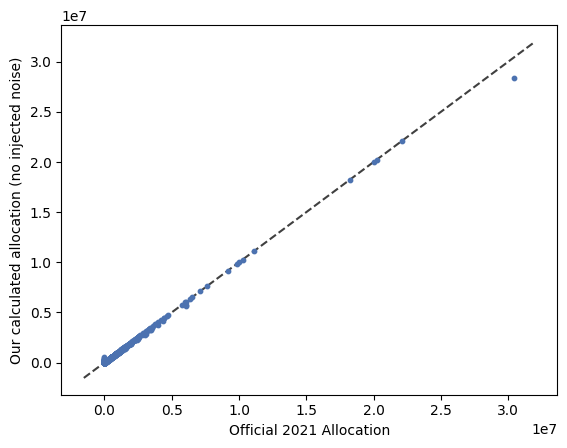

Name  \
State FIPS Code District ID                                         
6               22710         Los Angeles Unified School District   
2               180                     Anchorage School District   
31              72840                      Lincoln Public Schools   
6               14550              Fresno Unified School District   
                26370        Mount Diablo Unified School District   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
2               180                          5.860881e+06   
31              72840                        4.067561e+06   
6               14550                        2.120322e+07   
                26370                        2.568170e+06   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
2               180                                  7.111514e+05   
31              72840                                5.409623e+05   
6               14550                                5.241393e+06   
                26370                                3.939596e+05   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
2               180                             5.032731e+06   
31              72840                           2.665058e+06   
6               14550                           1.861120e+07   
                26370                           1.511221e+06   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
2               180                         4.981777e+06   
31              72840                       3.202285e+06   
6               14550                       1.813083e+07   
                26370                       1.218204e+06   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
2               180                          1.658654e+07   
31              72840                        1.047587e+07   
6               14550                        6.318665e+07   
                26370                        5.691555e+06   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
2               180                  5.787300e+06   
31              72840                3.658026e+06   
6               14550                2.379983e+07   
                26370                3.140680e+06   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
2               180                          0.000000e+00   
31              72840                        0.000000e+00   
6               14550                        6.039204e+06   
                26370                        0.000000e+00   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
2               180                     5.104967e+06         5.093155e+06   
31              72840                   2.455668e+06         3.084438e+06   
6               14550                   2.182530e+07         2.159909e+07   
                26370                   2.023363e+06         1.644063e+06   

                           

targeted
State level error State FIPS Code
1    -4.787777e+05
2     1.802719e+06
4    -8.953752e+05
5    -1.690601e+05
6     2.259654e+07
8     1.590034e+06
9    -4.451385e+05
10    2.330651e+06
11    7.125924e+05
12   -3.053165e+06
13   -5.114339e+06
15   -6.039264e+04
16    2.111145e+06
17   -2.792120e+06
18   -8.515327e+05
19   -2.470060e+05
20   -1.654187e+06
21    8.905509e+05
22   -2.403236e+06
23    2.041546e+06
24    1.676828e+06
25   -1.177642e+06
26   -1.167662e+06
27   -9.432086e+05
28   -4.713010e+05
29   -1.547457e+06
30    1.818884e+06
31   -3.270169e+05
32   -6.882235e+05
33    9.804675e+05
34   -2.511082e+06
35   -3.505400e+05
36   -5.208670e+06
37   -1.601621e+06
38    2.368892e+06
39   -3.838304e+06
40   -2.892714e+05
41    5.339942e+05
42   -3.023665e+06
44    1.835316e+06
45   -1.424146e+06
46    1.755385e+06
47   -6.102017e+05
48   -6.302941e+06
49   -2.876029e+05
50    1.579062e+06
51   -1.760173e+06
53    3.582988e+06
54    5.643056e+05
55   -5.882917e+05
56    1

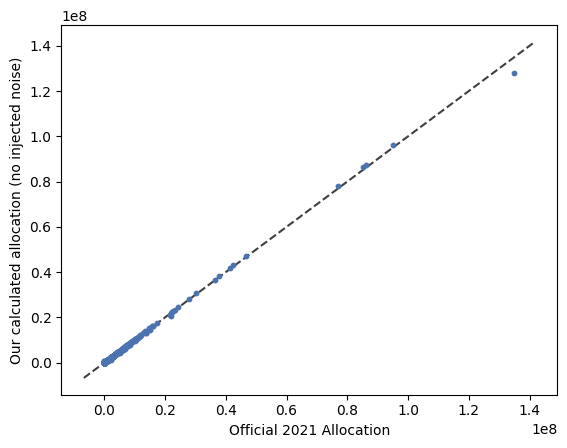

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
36              82047                               Kings County   
                82024                               Bronx County   
17              9930          Chicago Public School District 299   
6               14550             Fresno Unified School District   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
36              82047                        8.827453e+07   
                82024                        7.880462e+07   
17              9930                         7.911974e+07   
6               14550                        2.120322e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
36              82047                                2.182134e+07   
                82024                                1.931969e+07   
17              9930                                 1.955829e+07   
6               14550                                5.241393e+06   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
36              82047                           9.270965e+07   
                82024                           8.123289e+07   
17              9930                            8.232757e+07   
6               14550                           1.861120e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
36              82047                       8.319514e+07   
                82024                       7.250087e+07   
17              9930                        9.242648e+07   
6               14550                       1.813083e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
36              82047                        2.860007e+08   
                82024                        2.518581e+08   
17              9930                         2.734321e+08   
6               14550                        6.318665e+07   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
36              82047                8.712931e+07   
                82024                7.976208e+07   
17              9930                 7.885334e+07   
6               14550                2.379983e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
36              82047                        2.210905e+07   
                82024                        2.023962e+07   
17              9930                         2.000903e+07   
6               14550                        6.039204e+06   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
36              82047                   9.498686e+07         8.667319e+07   
                82024                   8.625801e+07         7.837469e+07   
17              9930                    8.518133e+07         9.596630e+07   
6               14550                   2.182530e+07         2.159909e+07   

                             ... 

In [49]:
saipe = get_inputs(2021)
for i in range(0,1):
    new_saipe = saipe
    mu = new_saipe['official_basic_hold_harmless']
    cv = new_saipe['cv']
    sigma = cv * mu
    
    new_saipe['official_total_alloc'] =  12
    

    grants = funding(SonnenbergAuthorizer, new_saipe, GroundTruth(), get_sppe("../data/sppe18.xlsx"))
    grants.head()
    
    grants.boxplot('true_grant_basic')
    plt.show()
    grants.boxplot('true_grant_concentration')
    plt.show()
    grants.boxplot('true_grant_targeted')
    plt.show()
    

    for grant_type in ["total", "basic", "concentration", "targeted"]:
        print(grant_type)
        compare_allocs(grant_type=grant_type, state_minimum=True, hold_harmless=True)

        

In [27]:
sppe = get_sppe("../data/sppe18.xlsx")
sppe.head()

,Name,ppe,Postal Code
State FIPS Code,,,
1,Alabama,9697,AL
2,Alaska,17726,AK
4,Arizona,8296,AZ
5,Arkansas,10072,AR
6,California,12510,CA


/Users/kentarohoffman/Downloads/dp-policy-master-2
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575


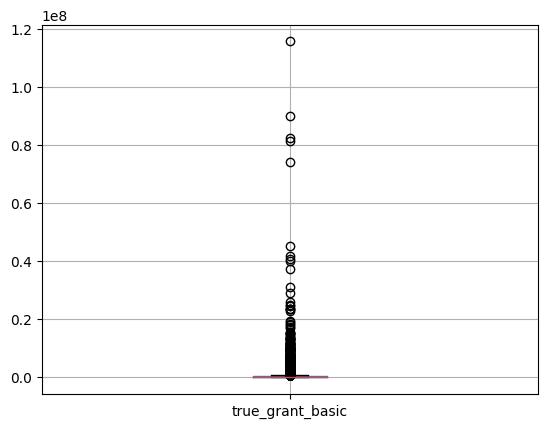

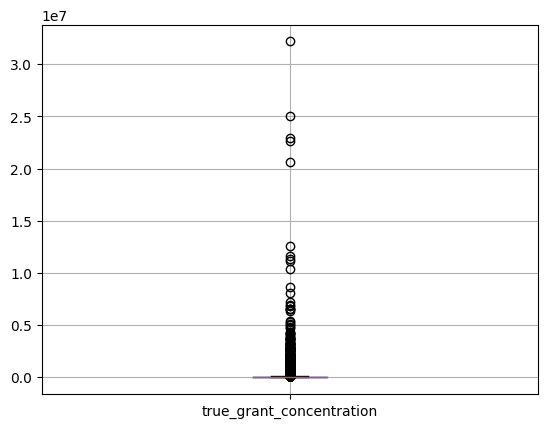

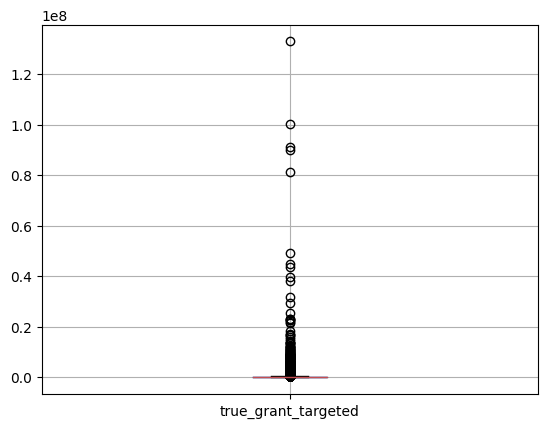

In [32]:
# Test with ground truth mechanism
saipe = get_inputs(2021)
grants = funding(SonnenbergAuthorizer, saipe, GroundTruth(), get_sppe("../data/sppe18.xlsx"))
grants.boxplot('true_grant_basic')
plt.show()
grants.boxplot('true_grant_concentration')
plt.show()
grants.boxplot('true_grant_targeted')
plt.show()

/Users/kentarohoffman/Downloads/dp-policy-master-2
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
total
State level error State FIPS Code
1     6.910050e+07
2     1.727093e+07
4     8.954219e+07
5     4.526321e+07
6     5.648967e+08
8     4.836872e+07
9     4.272197e+07
10    1.698622e+07
11    1.608756e+07
12    2.209907e+08
13    1.325106e+08
15    1.554488e+07
16    1.639109e+07
17    1.592521e+08
18    6.713091e+07
19    2.982481e+07
20    2.532719e+07
21    7.428141e+07
22    8.766432e+07
23    1.761418e+07
24    8.102885e+07
25    6.772895e+07
26    1.291163e+08
27    4.826552e+07
28    5.958592e+07
29    6.625734e+07
30    1.662187e+07
31    1.805842e+07
32    3.440820e+07
33    1.513068e+07
34    9.612916e+07
35    3.381221e+07
36    2.877003e+08
37    1.281273e+08
38    1.778415e+07
39    1.531544e+08
40    5.285914e+07
41   

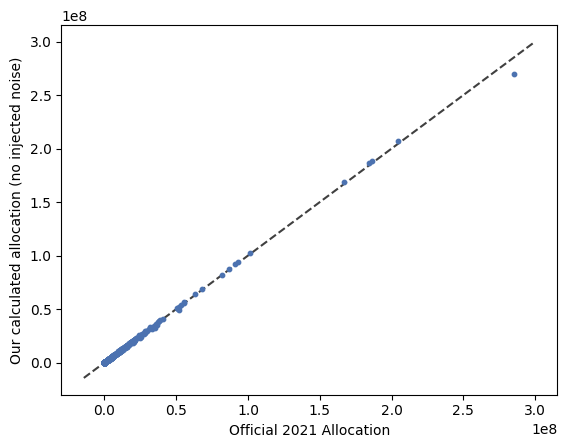

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
                14550             Fresno Unified School District   
36              82047                               Kings County   
11              30           District of Columbia Public Schools   
36              82024                               Bronx County   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
                14550                        2.120322e+07   
36              82047                        8.827453e+07   
11              30                           1.774410e+07   
36              82024                        7.880462e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
                14550                                5.241393e+06   
36              82047                                2.182134e+07   
11              30                                   4.229167e+06   
36              82024                                1.931969e+07   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
                14550                           1.861120e+07   
36              82047                           9.270965e+07   
11              30                              1.444236e+07   
36              82024                           8.123289e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
                14550                       1.813083e+07   
36              82047                       8.319514e+07   
11              30                          1.405369e+07   
36              82024                       7.250087e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
                14550                        6.318665e+07   
36              82047                        2.860007e+08   
11              30                           5.046931e+07   
36              82024                        2.518581e+08   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
                14550                2.379983e+07   
36              82047                8.712931e+07   
11              30                   1.774410e+07   
36              82024                7.976208e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
                14550                        6.039204e+06   
36              82047                        2.210905e+07   
11              30                           3.806250e+06   
36              82024                        2.023962e+07   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
                14550                   2.182530e+07         2.159909e+07   
36              82047                   9.498686e+07         8.667319e+07   
11              30                      1.371071e+07         1.360056e+07   
36              82024                   8.625801e+07         7.837469e+07   

                             ... 

basic
State level error State FIPS Code
1    -9.059529e+05
2     1.678302e+06
4    -1.472287e+06
5    -5.308251e+05
6     3.508586e+07
8     3.408538e+06
9    -7.503860e+05
10   -4.190583e+05
11    1.774410e+06
12   -3.460595e+06
13   -7.554960e+06
15   -7.426065e+04
16   -2.313910e+05
17   -3.494060e+06
18   -7.804844e+05
19   -4.888946e+05
20   -2.722386e+06
21    1.586333e+06
22   -3.174516e+06
23    5.816682e+05
24    2.952928e+06
25   -1.385219e+06
26   -8.981523e+05
27   -1.496863e+06
28   -8.926895e+05
29   -1.075726e+06
30   -5.135560e+04
31   -4.618631e+05
32   -6.992949e+05
33    1.231833e+06
34   -2.190058e+06
35   -5.742125e+05
36   -5.944147e+06
37   -2.222146e+06
38    2.778443e+06
39   -5.217642e+06
40   -7.472670e+05
41    1.221915e+06
42   -3.618215e+06
44   -2.837225e+05
45   -2.155308e+06
46    1.733936e+06
47   -1.062262e+06
48   -6.219283e+06
49   -4.632268e+05
50    1.686977e+06
51   -2.626901e+06
53    8.443689e+06
54    1.053093e+06
55   -4.634364e+05
56    1.59

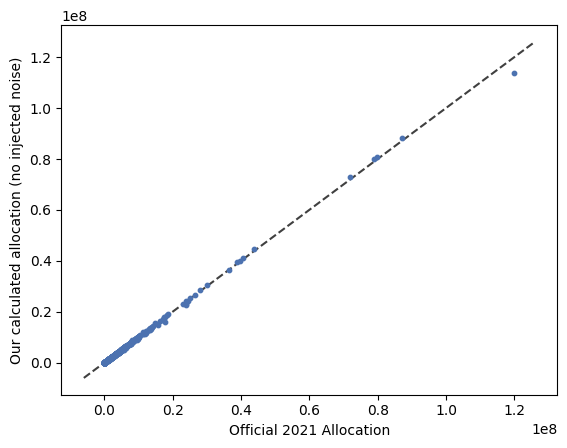

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
11              30           District of Columbia Public Schools   
6               14550             Fresno Unified School District   
36              82047                               Kings County   
                82024                               Bronx County   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
11              30                           1.774410e+07   
6               14550                        2.120322e+07   
36              82047                        8.827453e+07   
                82024                        7.880462e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
11              30                                   4.229167e+06   
6               14550                                5.241393e+06   
36              82047                                2.182134e+07   
                82024                                1.931969e+07   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
11              30                              1.444236e+07   
6               14550                           1.861120e+07   
36              82047                           9.270965e+07   
                82024                           8.123289e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
11              30                          1.405369e+07   
6               14550                       1.813083e+07   
36              82047                       8.319514e+07   
                82024                       7.250087e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
11              30                           5.046931e+07   
6               14550                        6.318665e+07   
36              82047                        2.860007e+08   
                82024                        2.518581e+08   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
11              30                   1.774410e+07   
6               14550                2.379983e+07   
36              82047                8.712931e+07   
                82024                7.976208e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
11              30                           3.806250e+06   
6               14550                        6.039204e+06   
36              82047                        2.210905e+07   
                82024                        2.023962e+07   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
11              30                      1.371071e+07         1.360056e+07   
6               14550                   2.182530e+07         2.159909e+07   
36              82047                   9.498686e+07         8.667319e+07   
                82024                   8.625801e+07         7.837469e+07   

                             ... 

concentration
State level error State FIPS Code
1    -1.031982e+05
2     1.532362e+05
4    -4.704991e+04
5    -6.945534e+04
6     7.416133e+06
8     5.452464e+05
9     2.561204e+03
10   -9.032346e+03
11    0.000000e+00
12    2.110367e+04
13   -1.251088e+06
15   -2.445079e+05
16   -2.725803e+05
17   -6.104095e+05
18   -1.862363e+05
19   -1.156129e+05
20   -5.663436e+05
21    3.814588e+05
22   -5.767695e+05
23   -8.112665e+04
24    8.916371e+05
25   -6.597423e+04
26   -8.934615e+04
27   -2.672891e+05
28    3.031316e+04
29   -5.160864e+05
30   -1.146889e+05
31   -5.110908e+05
32    2.459451e+04
33    5.383305e+04
34   -8.487088e+04
35    2.022562e+04
36   -2.042560e+05
37    7.716090e+04
38    2.412615e+05
39   -1.277377e+06
40   -8.497416e+03
41   -2.422003e+05
42   -3.460752e+05
44    1.288993e+03
45   -2.985014e+05
46    7.944564e+04
47   -7.947481e+05
48   -6.371342e+05
49   -3.809568e+05
50    3.741965e+04
51   -3.068779e+05
53    7.793433e+05
54    2.185352e+05
55   -3.988313e+05
56

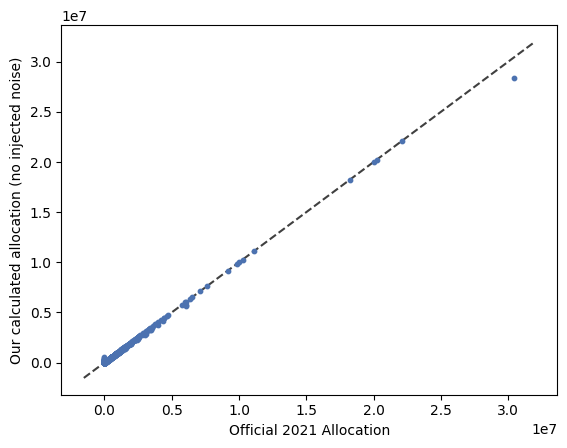

Name  \
State FIPS Code District ID                                         
6               22710         Los Angeles Unified School District   
2               180                     Anchorage School District   
31              72840                      Lincoln Public Schools   
6               14550              Fresno Unified School District   
                26370        Mount Diablo Unified School District   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
2               180                          5.860881e+06   
31              72840                        4.067561e+06   
6               14550                        2.120322e+07   
                26370                        2.568170e+06   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
2               180                                  7.111514e+05   
31              72840                                5.409623e+05   
6               14550                                5.241393e+06   
                26370                                3.939596e+05   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
2               180                             5.032731e+06   
31              72840                           2.665058e+06   
6               14550                           1.861120e+07   
                26370                           1.511221e+06   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
2               180                         4.981777e+06   
31              72840                       3.202285e+06   
6               14550                       1.813083e+07   
                26370                       1.218204e+06   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
2               180                          1.658654e+07   
31              72840                        1.047587e+07   
6               14550                        6.318665e+07   
                26370                        5.691555e+06   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
2               180                  5.787300e+06   
31              72840                3.658026e+06   
6               14550                2.379983e+07   
                26370                3.140680e+06   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
2               180                          0.000000e+00   
31              72840                        0.000000e+00   
6               14550                        6.039204e+06   
                26370                        0.000000e+00   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
2               180                     5.104967e+06         5.093155e+06   
31              72840                   2.455668e+06         3.084438e+06   
6               14550                   2.182530e+07         2.159909e+07   
                26370                   2.023363e+06         1.644063e+06   

                           

targeted
State level error State FIPS Code
1    -4.787777e+05
2     1.802719e+06
4    -8.953752e+05
5    -1.690601e+05
6     2.259654e+07
8     1.590034e+06
9    -4.451385e+05
10    2.330651e+06
11    7.125924e+05
12   -3.053165e+06
13   -5.114339e+06
15   -6.039264e+04
16    2.111145e+06
17   -2.792120e+06
18   -8.515327e+05
19   -2.470060e+05
20   -1.654187e+06
21    8.905509e+05
22   -2.403236e+06
23    2.041546e+06
24    1.676828e+06
25   -1.177642e+06
26   -1.167662e+06
27   -9.432086e+05
28   -4.713010e+05
29   -1.547457e+06
30    1.818884e+06
31   -3.270169e+05
32   -6.882235e+05
33    9.804675e+05
34   -2.511082e+06
35   -3.505400e+05
36   -5.208670e+06
37   -1.601621e+06
38    2.368892e+06
39   -3.838304e+06
40   -2.892714e+05
41    5.339942e+05
42   -3.023665e+06
44    1.835316e+06
45   -1.424146e+06
46    1.755385e+06
47   -6.102017e+05
48   -6.302941e+06
49   -2.876029e+05
50    1.579062e+06
51   -1.760173e+06
53    3.582988e+06
54    5.643056e+05
55   -5.882917e+05
56    1

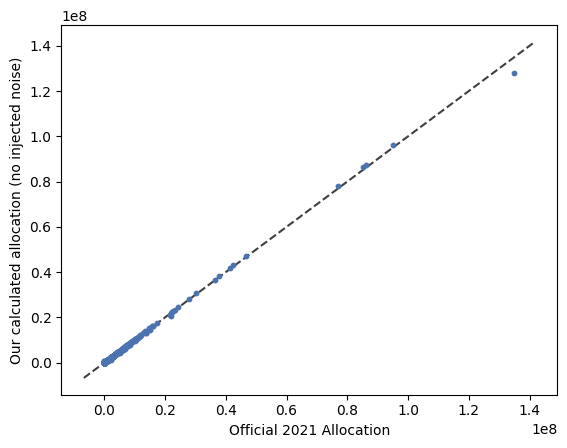

Name  \
State FIPS Code District ID                                        
6               22710        Los Angeles Unified School District   
36              82047                               Kings County   
                82024                               Bronx County   
17              9930          Chicago Public School District 299   
6               14550             Fresno Unified School District   

                             official_basic_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        1.162129e+08   
36              82047                        8.827453e+07   
                82024                        7.880462e+07   
17              9930                         7.911974e+07   
6               14550                        2.120322e+07   

                             official_concentration_hold_harmless  \
State FIPS Code District ID                                         
6               22710                                2.872760e+07   
36              82047                                2.182134e+07   
                82024                                1.931969e+07   
17              9930                                 1.955829e+07   
6               14550                                5.241393e+06   

                             official_targeted_hold_harmless  \
State FIPS Code District ID                                    
6               22710                           1.256837e+08   
36              82047                           9.270965e+07   
                82024                           8.123289e+07   
17              9930                            8.232757e+07   
6               14550                           1.861120e+07   

                             official_efig_hold_harmless  \
State FIPS Code District ID                                
6               22710                       1.381837e+08   
36              82047                       8.319514e+07   
                82024                       7.250087e+07   
17              9930                        9.242648e+07   
6               14550                       1.813083e+07   

                             official_total_hold_harmless  \
State FIPS Code District ID                                 
6               22710                        4.088080e+08   
36              82047                        2.860007e+08   
                82024                        2.518581e+08   
17              9930                         2.734321e+08   
6               14550                        6.318665e+07   

                             official_basic_alloc  \
State FIPS Code District ID                         
6               22710                1.199687e+08   
36              82047                8.712931e+07   
                82024                7.976208e+07   
17              9930                 7.885334e+07   
6               14550                2.379983e+07   

                             official_concentration_alloc  \
State FIPS Code District ID                                 
6               22710                        3.044203e+07   
36              82047                        2.210905e+07   
                82024                        2.023962e+07   
17              9930                         2.000903e+07   
6               14550                        6.039204e+06   

                             official_targeted_alloc  official_efig_alloc  \
State FIPS Code District ID                                                 
6               22710                   1.349669e+08         1.504197e+08   
36              82047                   9.498686e+07         8.667319e+07   
                82024                   8.625801e+07         7.837469e+07   
17              9930                    8.518133e+07         9.596630e+07   
6               14550                   2.182530e+07         2.159909e+07   

                             ... 

In [30]:
# for validation purposes, instead of using the saipe numbers, let's use the department of education numbers
